# **Model Development**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

df = pd.read_csv(file_path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h5> Linear Regression </h5>

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm=LinearRegression()
lm

LinearRegression()

In [12]:
X = df[['highway-mpg']]
Y = df['price']

In [16]:
lm.fit(X,Y)

LinearRegression()

In [18]:
Y_pred = lm.predict(X)
Y_pred[0:5]


array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [19]:
lm.intercept_

np.float64(38423.3058581574)

In [20]:
lm.coef_

array([-821.73337832])

In [21]:
lm1 = LinearRegression()

In [22]:
X = df[['engine-size']]
y = df['price']

In [23]:
lm1.fit(X,Y)

LinearRegression()

In [25]:
lm1.intercept_

np.float64(-7963.338906281024)

In [26]:
lm1.coef_

array([166.86001569])

In [29]:
y_hat = -7963.338906281024+166.86001569*X

In [30]:
y_hat

,engine-size
0,13728.463133
1,13728.463133
2,17399.383479
3,10224.402804
4,14729.623228
...,...
196,15563.923306
197,15563.923306
198,20903.443808
199,16231.363369


<h4>Multiple Linear Regression</h4>

In [31]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [32]:
lm.fit(Z,Y)

LinearRegression()

In [33]:
lm.intercept_

np.float64(-15806.62462632923)

In [34]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [36]:
Z = df[['normalized-losses','highway-mpg']]
lm1.fit(Z,Y)

LinearRegression()

In [37]:
lm1.coef_

array([   1.49789586, -820.45434016])

In [38]:
lm1.intercept_

np.float64(38201.31327245727)

<h4> Model Evaluation Using Visualization </h4>

In [39]:
import seaborn as sns

<Axes: xlabel='highway-mpg', ylabel='price'>

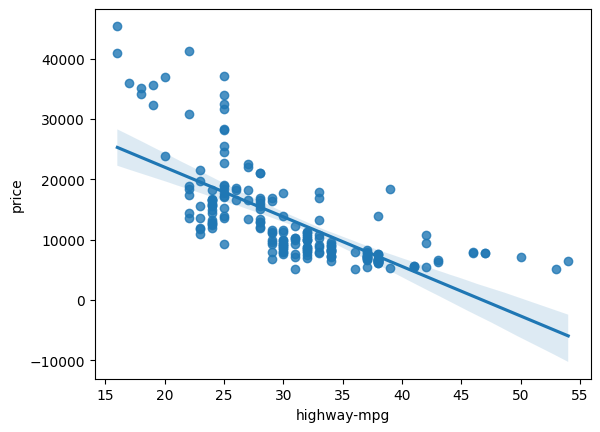

In [ ]:
plt.figure(figsize = (12,10))
sns.regplot(x='highway-mpg',y='price',data = df)

<Axes: xlabel='peak-rpm', ylabel='price'>

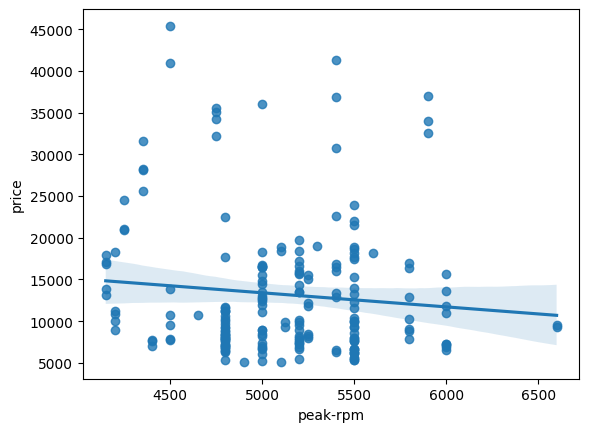

In [42]:
sns.regplot(x='peak-rpm',y='price',data = df)

<Axes: xlabel='highway-mpg', ylabel='price'>

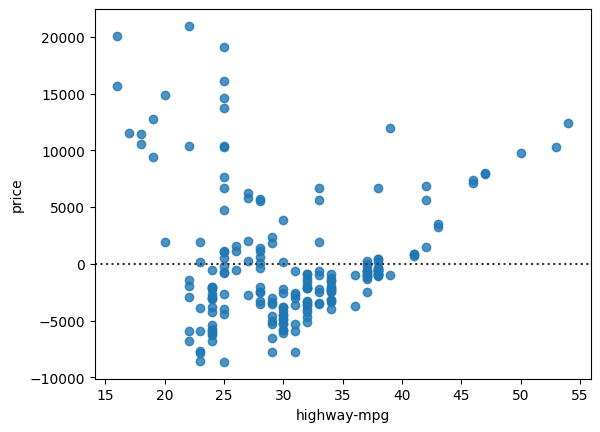

In [44]:
sns.residplot(x=df['highway-mpg'],y=df['price'])

In [46]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [48]:
y_pred = lm.predict(Z)


C:\Users\pavan b\AppData\Local\Temp\ipykernel_20136\3845885283.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'],hist = False,color = 'r',label = 'Actual One')
C:\Users\pavan b\AppData\Local\Temp\ipykernel_20136\3845885283.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

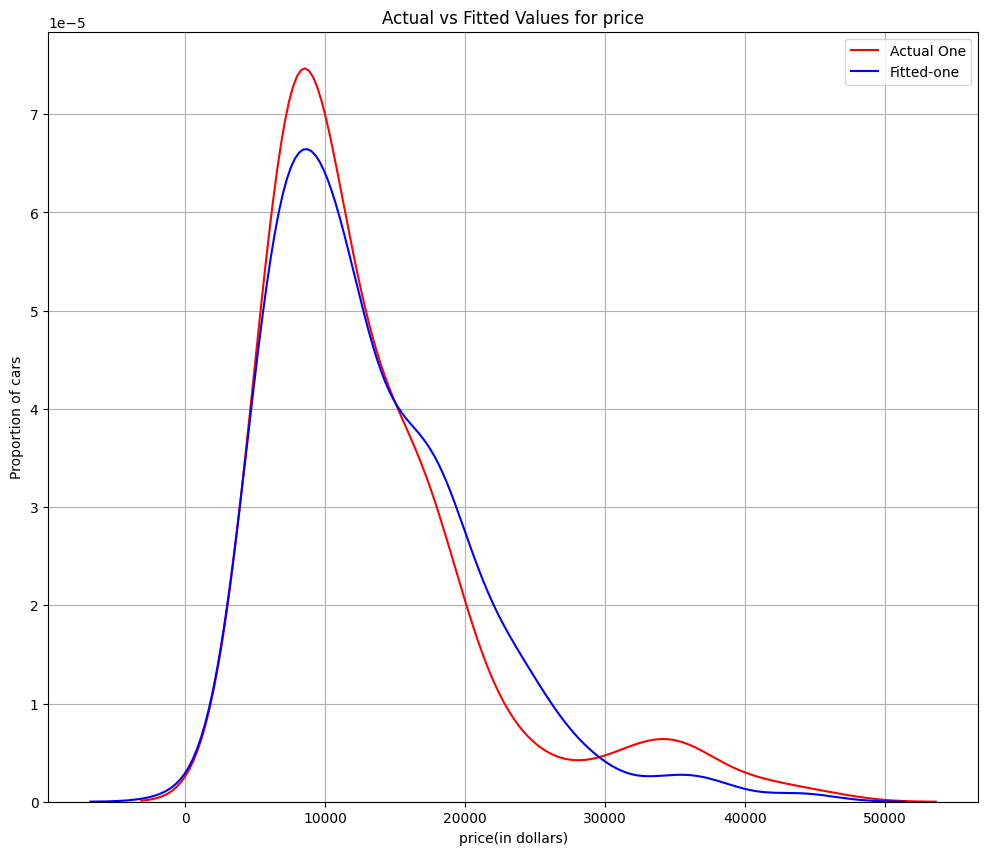

In [56]:
plt.figure(figsize = (12,10))

ax1 = sns.distplot(df['price'],hist = False,color = 'r',label = 'Actual One')
sns.distplot(y_pred,hist = False,color = 'b',label = 'Fitted-one',ax = ax1)

plt.title('Actual vs Fitted Values for price')
plt.xlabel('price(in dollars)')
plt.ylabel('Proportion of cars')
plt.grid()
plt.legend()
plt.show()


<h4>Polynomial Regression and Pipelines</h4>

In [57]:
x = df['highway-mpg']
y = df['price']

In [61]:
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [63]:
def PlotPolly(model,independent_variable,dependent_variable,name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

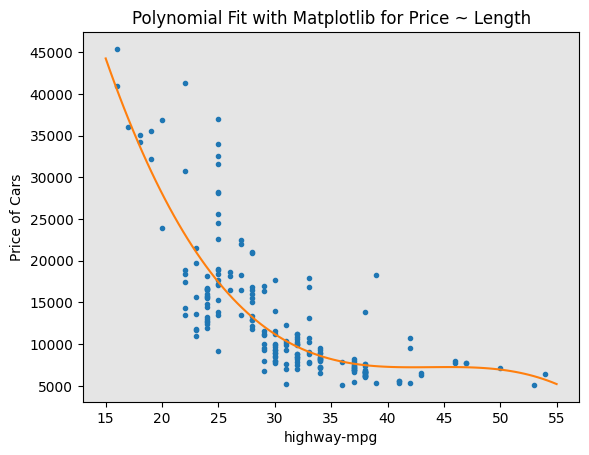

In [64]:
PlotPolly(p, x, y, 'highway-mpg')

In [65]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


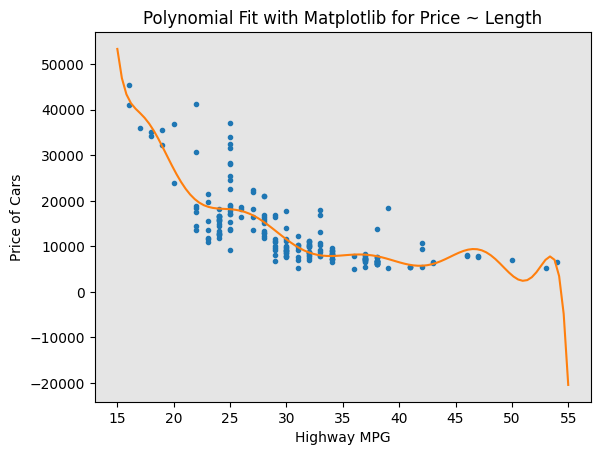

In [66]:
f1= np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'Highway MPG')

<h4> Multivariate Polynomial<h4>

In [67]:
from sklearn.preprocessing import PolynomialFeatures

In [68]:
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [71]:
Z_pr = pr.fit_transform(Z)

In [72]:
Z.shape

(201, 4)

In [75]:
Z_pr.shape

(201, 15)

<h4>Pipeline</h4>

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [77]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [78]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [79]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [80]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [81]:
input = [('scaler',StandardScaler()),('model',LinearRegression())]
pipe2 = Pipeline(input)
pipe2

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [82]:
pipe.fit(Z,y)
y_pipe = pipe.predict(Z)
y_pipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

<h5>Measures for In-Sample Evaluation</h5>

In [86]:
lm.fit(X,Y)
print("r-square is:",lm.score(X,Y))

r-square is: 0.7609686443622008


In [87]:
t_pred = lm.predict(X)

In [88]:
from sklearn.metrics import mean_squared_error


In [89]:
mse = mean_squared_error(df['price'],y_pred)
mse

np.float64(11980366.87072649)

In [90]:
lm.fit(Z,df['price'])
lm.score(Z,df['price'])

0.8093562806577457

In [91]:
y_pred_multifit = lm.predict(Z)
mean_squared_error(df['price'],y_pred)

np.float64(11980366.87072649)

In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(y,p(x))
r_squared

-2.7640049164849976

In [100]:
mean_squared_error(df['price'],p(x))

np.float64(20474146.426361218)

In [106]:
new_input = np.arange(1,100,1).reshape(-1,1)

In [107]:
lm.fit(X,Y)
lm

LinearRegression()

In [108]:
y_pred = lm.predict(new_input)


c:\Users\pavan b\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


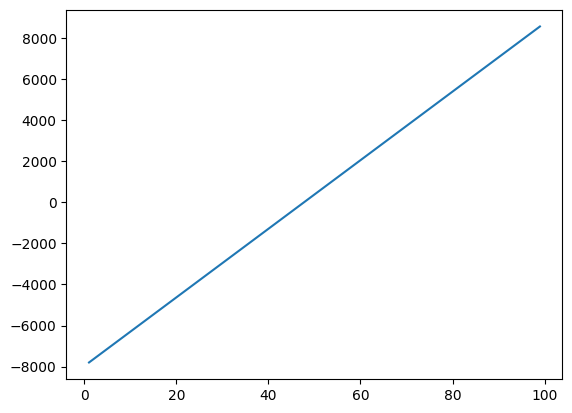

In [110]:
plt.plot(new_input,y_pred)
plt.show()